**Libraries Importation**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import graphviz 
from graphviz import Source
import warnings
warnings.filterwarnings('ignore')

**Data Exploration**

In [9]:
data=pd.read_excel('/content/drive/My Drive/default_of_credit_card_clients.xls')
data.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nouvelle section

In [10]:
data = data.drop([0])
data.sample(10)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
24526,24526,240000,1,2,1,41,0,0,0,0,...,231036,194520,195392,8135,8685,10252,7016,7033,7019,1
10442,10442,40000,1,2,2,22,-1,-1,-1,0,...,6965,2759,0,2833,9495,0,0,0,0,0
11473,11473,20000,1,1,2,29,3,2,2,2,...,17613,18371,19865,0,3000,0,1200,1800,0,1
1095,1095,50000,1,2,2,31,1,2,0,0,...,19586,19143,20051,0,4300,2150,0,1204,1000,0
13450,13450,290000,2,1,2,27,0,0,0,0,...,100000,92238,90447,5000,6039,4000,4000,4000,3000,0
19460,19460,130000,2,2,1,33,-1,-1,-1,0,...,14277,0,0,0,13853,1000,0,0,0,0
28492,28492,40000,2,3,1,36,0,0,2,0,...,20671,22328,21830,3000,0,3000,2000,0,2000,0
8720,8720,100000,1,1,2,27,0,0,0,0,...,61153,64976,66309,4000,2276,2377,5000,2411,2384,0
266,266,150000,2,2,1,25,-1,-1,-2,-1,...,316,316,316,0,0,316,316,316,316,0
8730,8730,50000,1,2,1,43,0,0,0,0,...,9225,9417,9617,1140,1150,331,341,356,330,0


In [12]:
data.tail(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29991,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29993,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29994,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [13]:
print('On a',data.shape[0],'lignes dans notre dataset.')
print('On a',data.shape[1],'colonnes dans notre dataset.')

On a 30000 lignes dans notre dataset.
On a 25 colonnes dans notre dataset.


In [14]:
data.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  object
 1   X1          30000 non-null  object
 2   X2          30000 non-null  object
 3   X3          30000 non-null  object
 4   X4          30000 non-null  object
 5   X5          30000 non-null  object
 6   X6          30000 non-null  object
 7   X7          30000 non-null  object
 8   X8          30000 non-null  object
 9   X9          30000 non-null  object
 10  X10         30000 non-null  object
 11  X11         30000 non-null  object
 12  X12         30000 non-null  object
 13  X13         30000 non-null  object
 14  X14         30000 non-null  object
 15  X15         30000 non-null  object
 16  X16         30000 non-null  object
 17  X17         30000 non-null  object
 18  X18         30000 non-null  object
 19  X19         30000 non-null  object
 20  X20   

In [16]:
#Vérifier les lignes dupliquées
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

#Supprimer les lignes dupliquées
data=data.drop_duplicates()

There are 0 duplicate rows in the data set.


In [17]:
#Vérifier les valeurs nulles
print(f"There are {data.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


<Figure size 400x300 with 0 Axes>

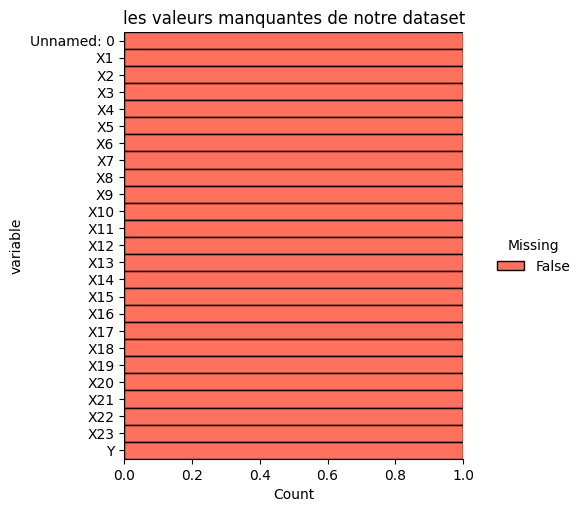

In [18]:
plt.figure(figsize=(4,3))
sns.displot(
    data=data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "CMRmap"
)
plt.title('les valeurs manquantes de notre dataset')
plt.show()

In [19]:
print('HAMDOULLEEEEH !!!!')

HAMDOULLEEEEH !!!!


**Data Visulalisation**

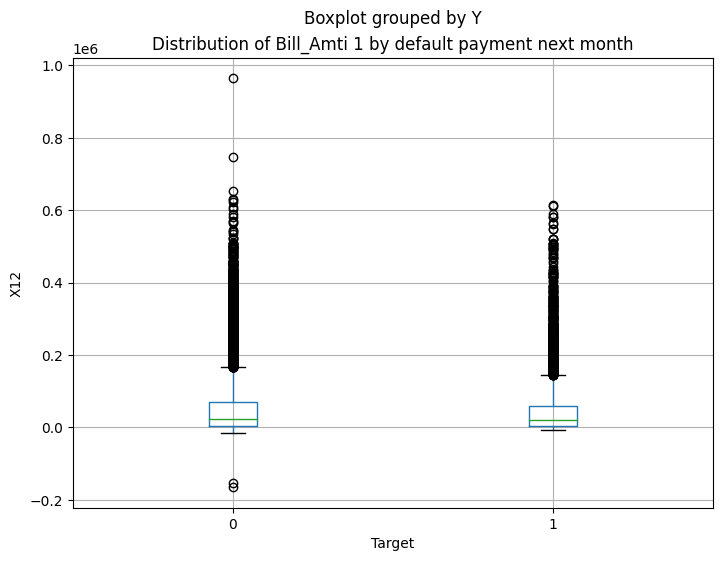

In [20]:
column_name = 'X12'
target_column = 'Y'

data.boxplot(column=column_name, by=target_column, figsize=(8,6))
plt.xlabel('Target')
plt.ylabel(column_name)
plt.title('Distribution of Bill_Amti 1 by default payment next month'.format(column_name, target_column))

#Afficher le plot
plt.show()

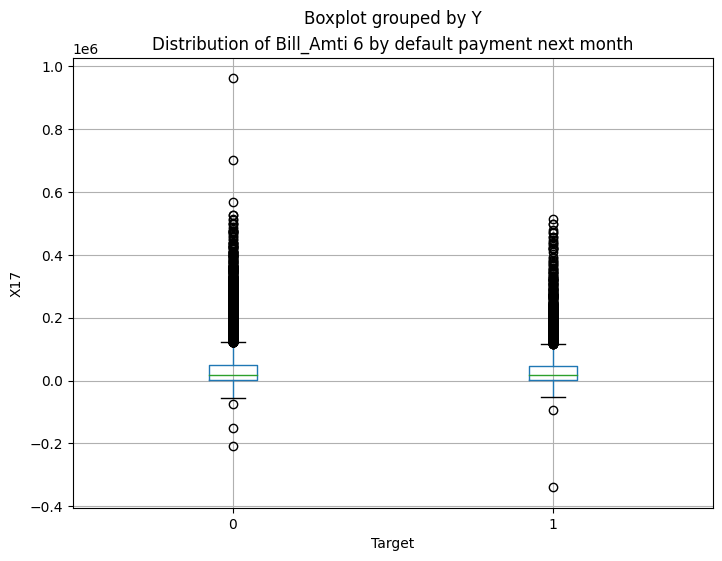

In [21]:
column_name = 'X17'
target_column = 'Y'

data.boxplot(column=column_name, by=target_column, figsize=(8,6))
plt.xlabel('Target')
plt.ylabel(column_name)
plt.title('Distribution of Bill_Amti 6 by default payment next month'.format(column_name, target_column))

#Afficher le plot
plt.show()

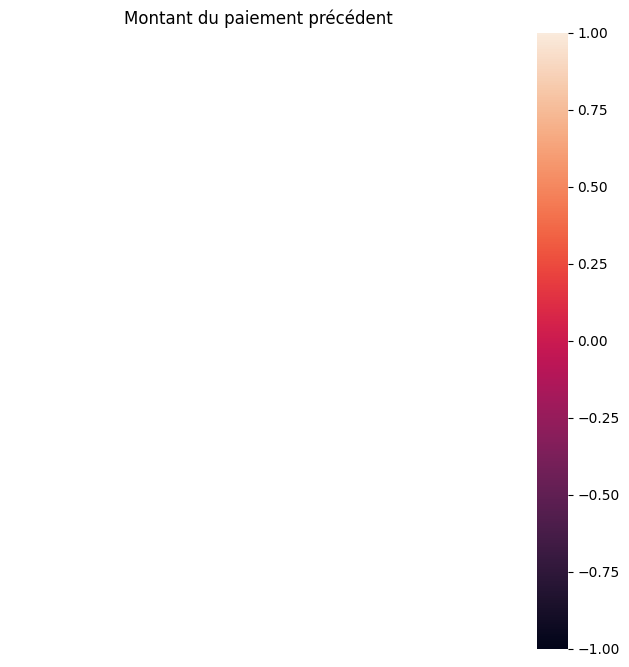

In [22]:
var = ['X19','X20','X21','X22','X23',]

plt.figure(figsize = (8,8))
plt.title('Montant du paiement précédent')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

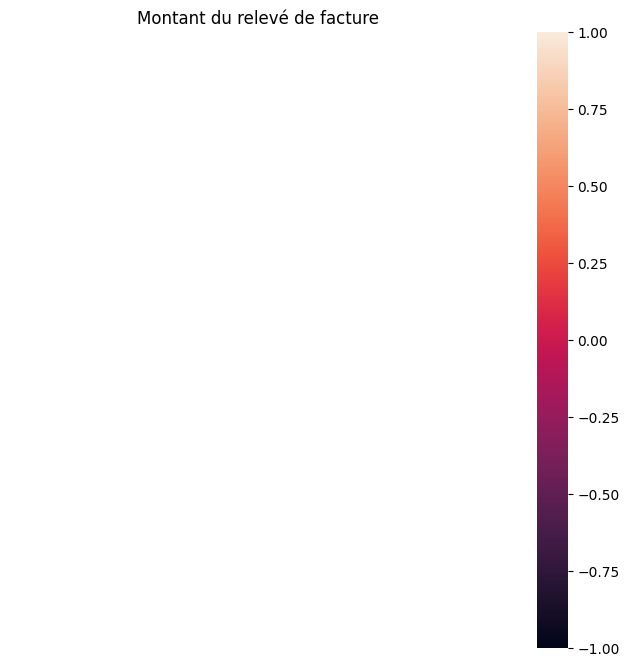

In [23]:
var = ['X12', 'X13', 'X14', 'X15', 'X16','X17']

plt.figure(figsize = (8,8))
plt.title('Montant du relevé de facture')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

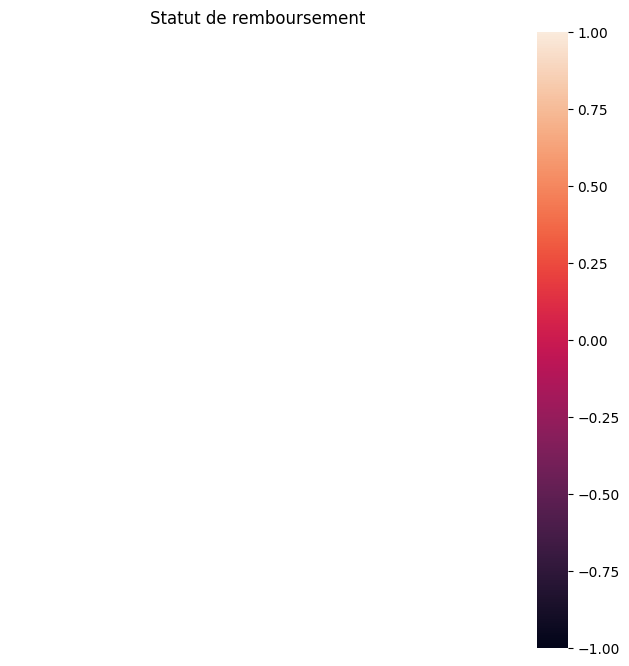

In [24]:
var = ['X6','X7', 'X8', 'X9', 'X10', 'X11']

plt.figure(figsize = (8,8))
plt.title('Statut de remboursement')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

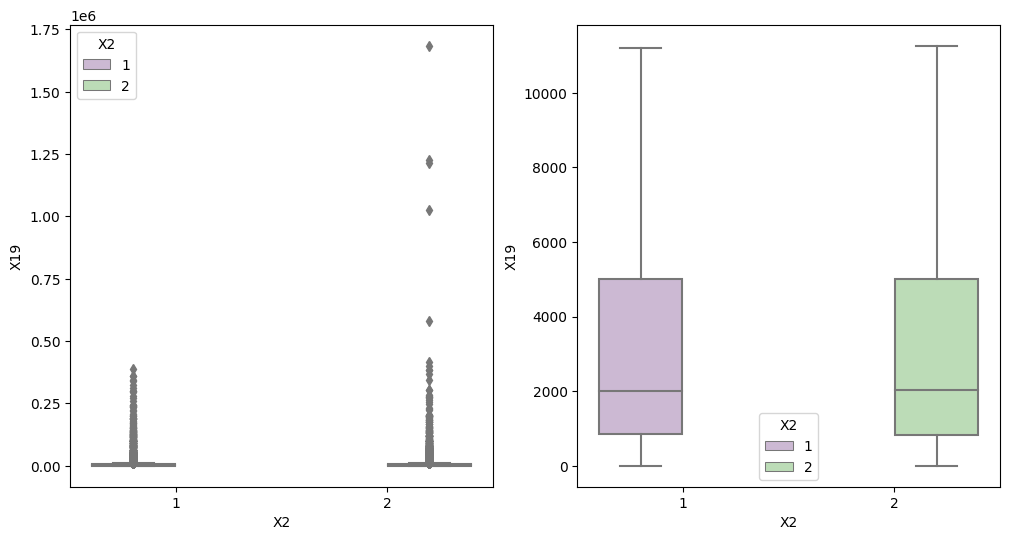

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="X2", y="X19", hue="X2",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="X2", y="X19", hue="X2",data=data, palette="PRGn",showfliers=False)
plt.show()

In [26]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

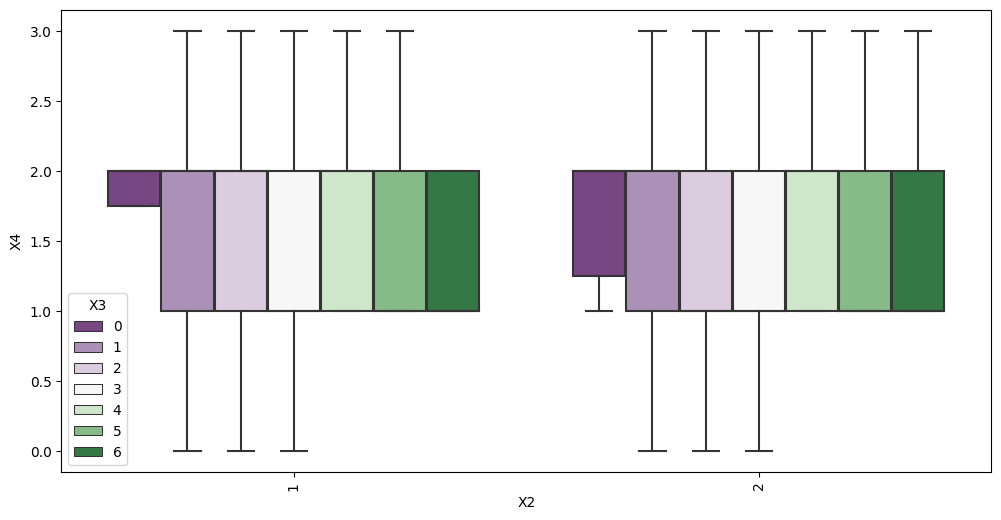

In [27]:
boxplot_variation('X2','X4', 'X3',12)

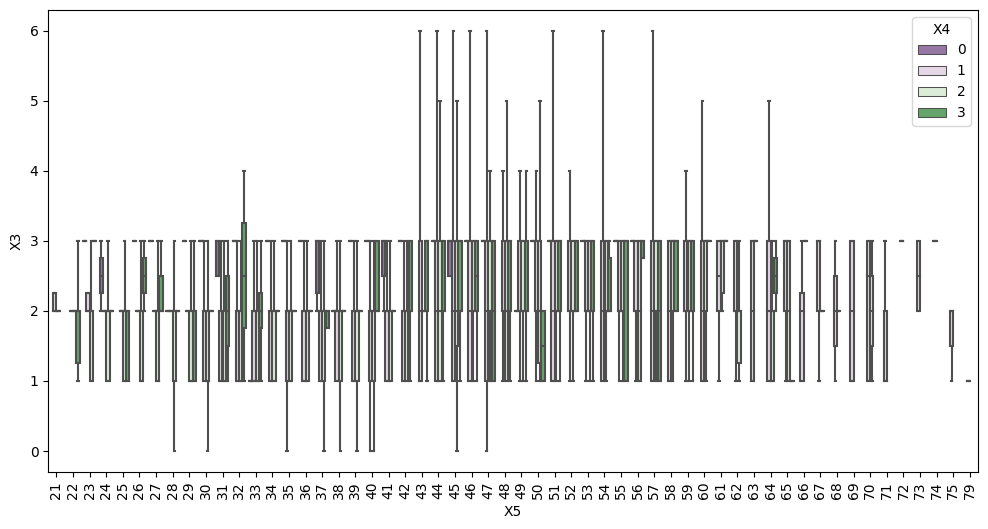

In [28]:
boxplot_variation('X5','X3','X4',12)

In [29]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [30]:

data = data.apply(lambda x: object_to_int(x))
data.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,0,2,1,2,1,3,4,4,1,1,...,377,384,414,0,494,0,0,0,0,1
2,1,12,1,2,2,5,1,4,2,2,...,2344,2452,2402,0,699,885,946,0,1797,1
3,2,9,1,2,2,13,2,2,2,2,...,6135,6365,6480,1211,1185,885,946,949,3576,0


In [31]:
#Vérifier le changement de object vers integer
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  30000 non-null  int64
 1   X1          30000 non-null  int64
 2   X2          30000 non-null  int64
 3   X3          30000 non-null  int64
 4   X4          30000 non-null  int64
 5   X5          30000 non-null  int64
 6   X6          30000 non-null  int64
 7   X7          30000 non-null  int64
 8   X8          30000 non-null  int64
 9   X9          30000 non-null  int64
 10  X10         30000 non-null  int64
 11  X11         30000 non-null  int64
 12  X12         30000 non-null  int64
 13  X13         30000 non-null  int64
 14  X14         30000 non-null  int64
 15  X15         30000 non-null  int64
 16  X16         30000 non-null  int64
 17  X17         30000 non-null  int64
 18  X18         30000 non-null  int64
 19  X19         30000 non-null  int64
 20  X20         30000 non-null  

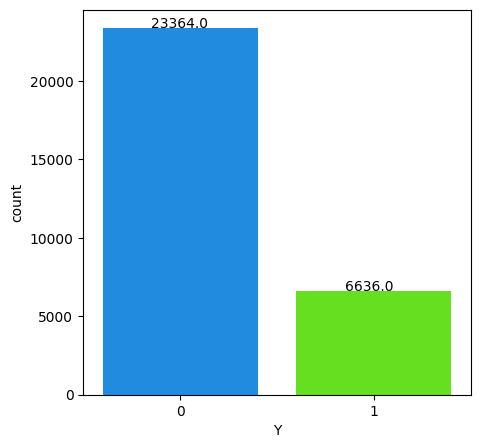

In [32]:
#Voir Si la dataset est équilibrée ?
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Y'], palette="gist_rainbow_r")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [33]:
#Diviser la dataset
X=data[data.columns[:-1]]
y=data['Y']

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (21000, 24)
X_test shape: (9000, 24)


In [36]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from imblearn.over_sampling import SMOTE
X = data.drop('Y', axis=1)
y = data['Y']

sm = SMOTE(sampling_strategy='minority', random_state=42)

oversampled_X, oversampled_Y = sm.fit_resample(X, y)


data = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
data['Y'].value_counts()

1    23364
0    23364
Name: Y, dtype: int64

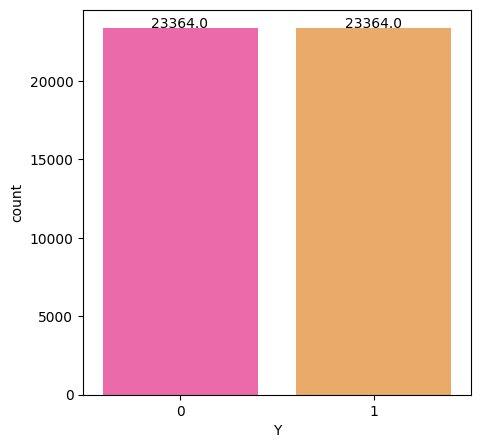

In [38]:
#Voir Si on a fixé le probléme ?
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Y'], palette="spring")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

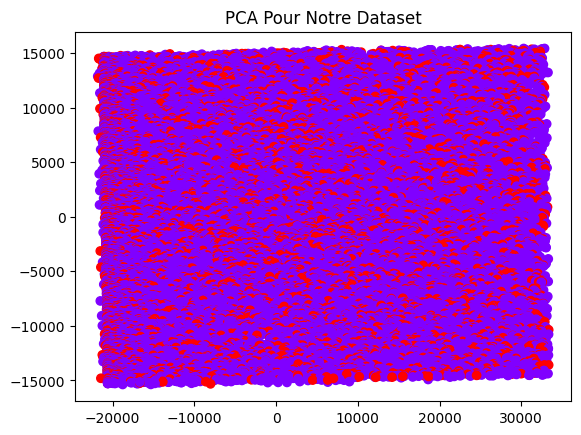

In [39]:
# Applique PCA pour les attributs
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Créer scatter plot pour les résultats de PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.title('PCA Pour Notre Dataset')
plt.show()

**Neural Network**

In [40]:
# Initialiser Multi-layer Perceptron 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)

#Entrainer le classifieur
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=25)

In [41]:
# Faire les prédictions
mlp_pred = mlp.predict(X_test)

# Cross_val score
from sklearn.model_selection import cross_val_score
mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

In [42]:
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import accuracy_score

In [43]:
# Accuracy
print('Accuracy: %.3f' % mlp.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % mlp_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, mlp_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, mlp_pred))

# f1 score
print('F1 score: %.3f' % f1_score(y_test, mlp_pred))

Accuracy: 0.817
Cross-validation accuracy: 0.817
Precision: 0.663
Recall: 0.371
F1 score: 0.476


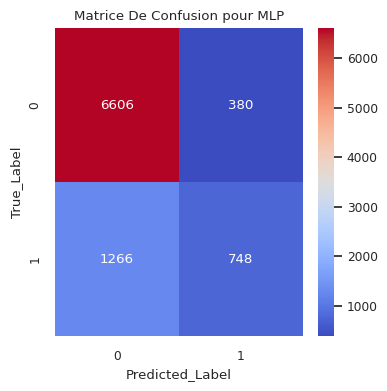

In [44]:
# confusion matrix pour Multi-layer Perceptron.
matrix = confusion_matrix(y_test,mlp_pred)
sns.set(font_scale=0.8)
plt.subplots(figsize=(4, 4))
sns.heatmap(matrix,annot=True, cmap='coolwarm',fmt="d")
plt.ylabel('True_Label')
plt.xlabel('Predicted_Label')
plt.title('Matrice De Confusion pour MLP');

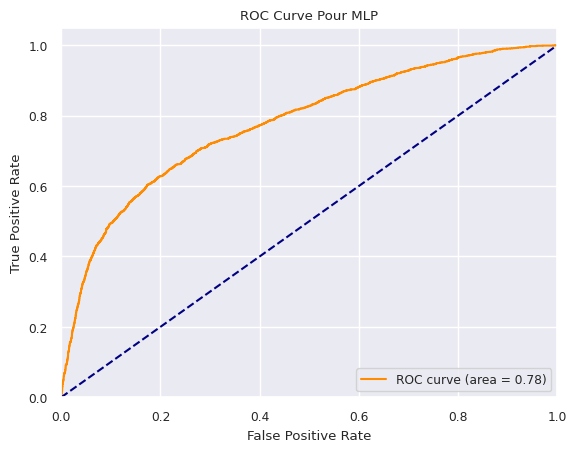

In [45]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités prédites de classe positive pour l'ensemble de test
mlp_prob = mlp.predict_proba(X_test)[:,1]

# Calculer fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, mlp_prob)

# Calculer AUC score
roc_auc = auc(fpr, tpr)

#  ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Pour MLP')
plt.legend(loc="lower right")
plt.show()


**SVC**

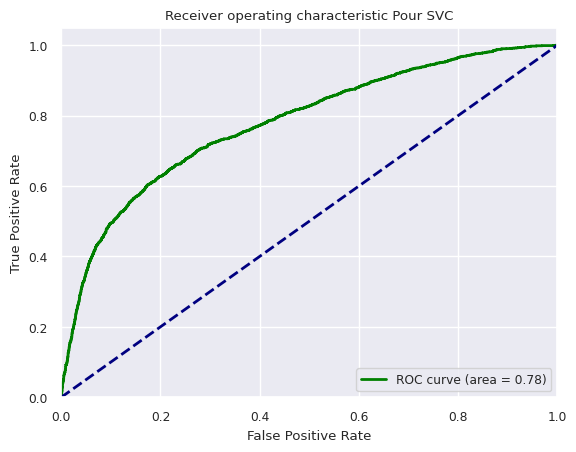

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc




# Utiliser StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# SVC
clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
clf.fit(X_train, y_train)

# Prédire la probabilité de chaque classe pour les données de test
y_score = clf.decision_function(X_test)

# Calculer le taux de faux positifs (fpr), le taux de vrais positifs (tpr) et les seuils de la courbe ROC
fpr_c, tpr_c, thresholds = roc_curve(y_test, y_score)


# Calculer l'aire sous la courbe ROC (AUC)
svc_auc = auc(fpr, tpr)
# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Pour SVC')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7788333333333334


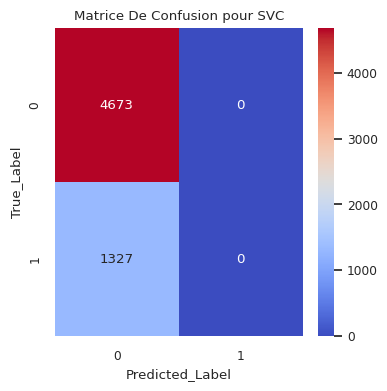

In [48]:
# confusion matrix pour SVC
matrix = confusion_matrix(y_test,y_pred)
sns.set(font_scale=0.8)
plt.subplots(figsize=(4, 4))
sns.heatmap(matrix,annot=True, cmap='coolwarm',fmt="d")
plt.ylabel('True_Label')
plt.xlabel('Predicted_Label')
plt.title('Matrice De Confusion pour SVC');

**Decision Tree**

In [49]:
# Initialiser Decision Tree classifieur
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

# Entrainer l'estimateur
tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

Text(0.5, 1.0, 'Decision Tree')

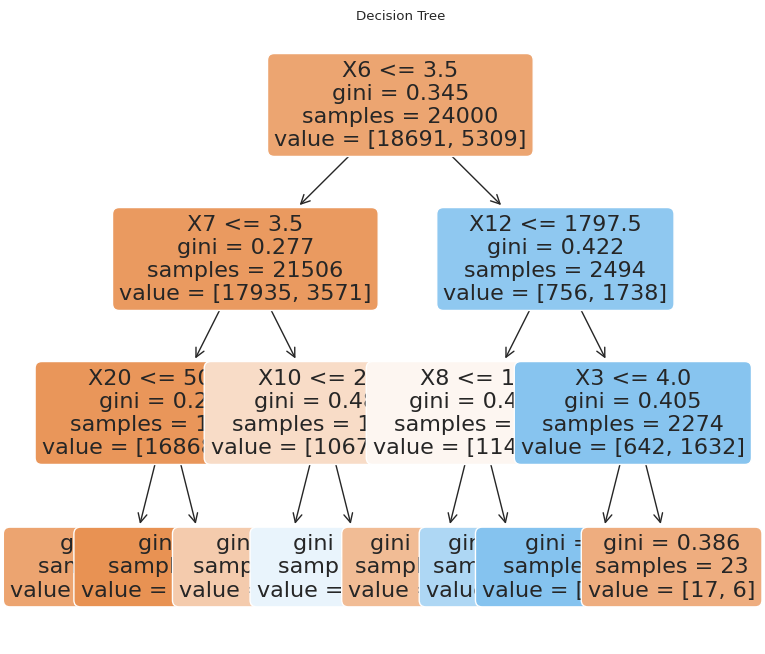

In [50]:
# Afficher l'arbre
dot_data = tree.export_graphviz(tr, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
fig=plt.figure(figsize=(8,8))
tree.plot_tree(tr.fit(X_train, y_train),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Tree')

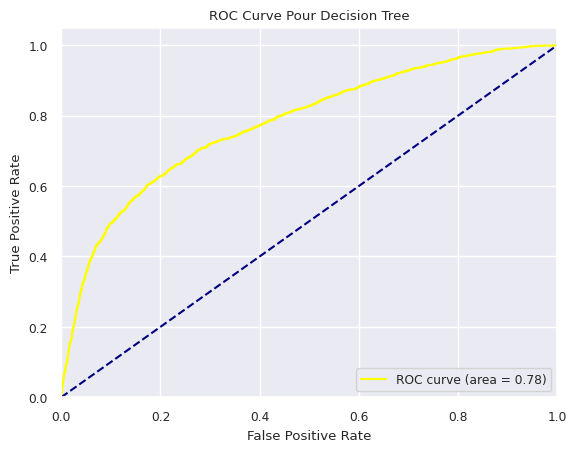

In [51]:
# Calculer les probabilités prédites de classe positive pour l'ensemble de test
tr_prob = tr.predict_proba(X_test)[:,1]

# Calculer fpr, tpr, and thresholds
fpr_tr, tpr_tr, thresholds = roc_curve(y_test, tr_prob)

# Calculer AUC score
tr_auc = auc(fpr, tpr)

#  ROC curve
plt.plot(fpr, tpr, color='yellow', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Pour Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Fairepredictions.
tr_pred=tr.predict(X_test)

# Cross_valscore
tr_cv=cross_val_score(tr, X_train, y_train, cv=10).mean()

In [53]:
# Accuracy
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % tr_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Precision: %.3f' % recall_score(y_test, tr_pred))

# f1 score
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

Accuracy: 0.819
Cross-validation accuracy: 0.822
Precision: 0.662
Precision: 0.369
F1 score: 0.473


**Comparaison des algorithmes**

In [54]:
d={
'': ['Decision Tree','Neural Network (MLP)','Support Vector Classifier'],
'Accuracy': [tr.score(X_test,y_test),mlp.score(X_test, y_test),clf.score(X_test,y_test)],
}

results=pd.DataFrame(data=d).round(3).set_index('')
results

,Accuracy
,
Decision Tree,0.819
Neural Network (MLP),0.243
Support Vector Classifier,0.779


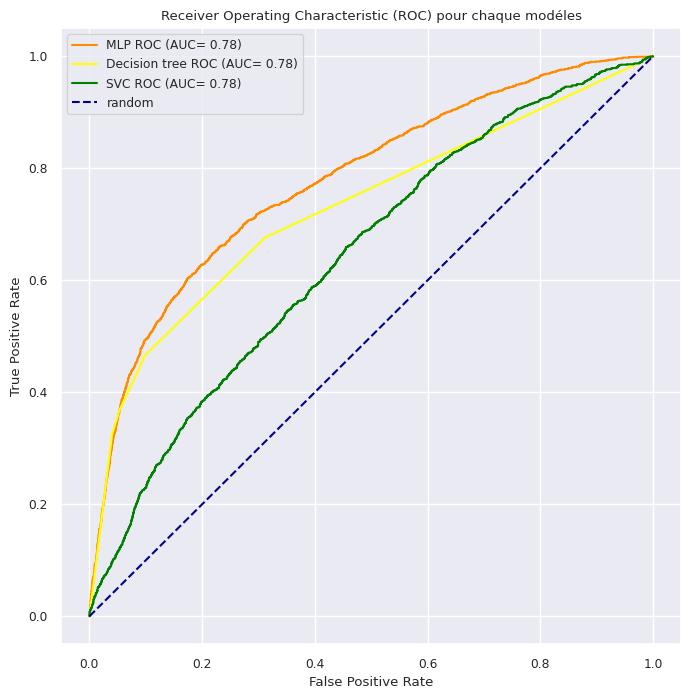

In [55]:
# ROC curve.
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', label='MLP ROC (AUC= %0.2f)'% roc_auc)
plt.plot(fpr_tr, tpr_tr, color='yellow', label='Decision tree ROC (AUC= %0.2f)'% tr_auc)
plt.plot(fpr_c, tpr_c, color='green',label='SVC ROC (AUC= %0.2f)'% svc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) pour chaque modéles')
plt.legend()
plt.show()

**SAAAAVE**

In [56]:
from tkinter import * 

In [57]:
tr1=tree.DecisionTreeClassifier()
tr1.fit(oversampled_X,oversampled_Y)

DecisionTreeClassifier()

In [58]:
import joblib

In [59]:
joblib.dump(tr1,'Credit_Card_Samer')

['Credit_Card_Samer']

In [60]:
model=joblib.load("Credit_Card_Samer")

In [61]:
pred=model.predict([[1,1,1,1,1,1,1,100,120,120,100,1,1,1,1,1,1,1,0,1,1,1,1,1]])

In [62]:
if pred ==0:
  print('Transaction Normal')
else : 
  print('Transaction à Vérifier')
 

Transaction à Vérifier


LogisticRegression

In [63]:
# Initialiser Decision Tree classifieur
from sklearn.linear_model import LogisticRegression
Lreg = LogisticRegression()

# Entrainer l'estimateur
Lreg.fit(X_train, y_train)

preds = Lreg.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.53      0.02      0.03      1327

    accuracy                           0.78      6000
   macro avg       0.65      0.51      0.45      6000
weighted avg       0.72      0.78      0.69      6000



In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'solver':['lbfgs', 'liblinear'], 'C' : [1, 20]}
model = LogisticRegression()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

best_model = clf.best_estimator_
score = best_model.score(X_train, y_train)
print("score : %0.3f" % score)
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))


score : 0.801
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4673
           1       0.64      0.21      0.31      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.59      0.60      6000
weighted avg       0.77      0.80      0.76      6000



**knn**

In [68]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((24000, 24), (6000, 24))

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Entraîner le modèle sur les données d'entraînement


In [99]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = knn.predict(X_test)

# Évaluer les performances du modèle
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("accuracy KNN :", accuracy)

# Calculer la matrice de confusion


accuracy KNN : 0.7766666666666666


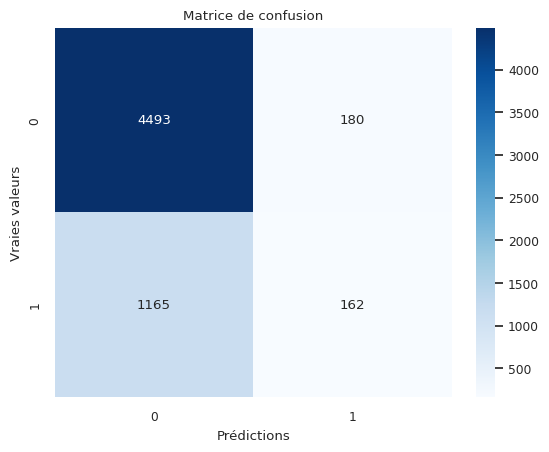

In [93]:
# Calculer la matrice de confusion
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Créer la matrice de confusion sous forme de heatmap
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()
